# 1. Data Loading

In [16]:
import numpy as np
import pandas as pd

planilha = 'https://docs.google.com/spreadsheets/d/1tF1oTADXJ8Yd48lEEr-EuWCeI2nYNgbcaKwumjRMaYI/export?format=csv'

df_int_gen_AF = pd.read_csv(planilha)
df_int_gen_AF.head()

,Teor Texto,É Genérica?
0,- vista dos autos à fazenda pública em confo...,Não
1,- vista dos autos à fazenda pública em confo...,Sim
2,- vista dos autos à fazenda pública em confo...,Sim
3,- vista dos autos à fazenda pública em confo...,Sim
4,- vista dos autos à fazenda pública em confo...,Sim


In [17]:
df_int_gen_AF['É Genérica?'].value_counts()

É Genérica?
Sim    350
Não    256
Name: count, dtype: int64

In [18]:
X_texts = df_int_gen_AF['Teor Texto'].to_numpy()
y = np.array([1 if ans == 'Sim' else 0 for ans in df_int_gen_AF['É Genérica?']])

# 2. Classificação

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 

pipeline = Pipeline(steps=[
    ('feature-extraction', TfidfVectorizer(max_features=3000, ngram_range=(1,1))),
    ('clf', SVC(probability=True))
])

skf = StratifiedKFold(n_splits=5, shuffle=True)

acc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc = []

for i, (train, test) in enumerate(skf.split(X_texts, y)):
    # Treinando
    pipeline.fit(X_texts[train], y[train])

    # Predict
    y_pred = pipeline.predict(X_texts[test])
    y_pred_proba = pipeline.predict_proba(X_texts[test])

    # Avaliando
    acc_scores.append(100*accuracy_score(y[test], y_pred))
    precision_scores.append(100*precision_score(y[test], y_pred))
    recall_scores.append(100*recall_score(y[test], y_pred))
    f1_scores.append(100*f1_score(y[test], y_pred))
    auc.append(roc_auc_score(y[test], y_pred_proba[:,1]))

print(f'Acurácia --> Média: {np.mean(acc_scores):.2f}% Std: {np.std(acc_scores):.2f}%')
print(f'Precisão --> Média: {np.mean(precision_scores):.2f}% Std: {np.std(precision_scores):.2f}%')
print(f'Recall   --> Média: {np.mean(recall_scores):.2f}% Std: {np.std(recall_scores):.2f}%')
print(f'F1-Score --> Média: {np.mean(f1_scores):.2f}% Std: {np.std(f1_scores):.2f}%')
print(f'AUC      --> Média: {np.mean(auc):.2f} Std: {np.std(auc):.2f}')

Acurácia --> Média: 92.79% Std: 2.71%
Precisão --> Média: 95.06% Std: 4.71%
Recall   --> Média: 92.57% Std: 2.77%
F1-Score --> Média: 93.68% Std: 2.20%
AUC      --> Média: 0.98 Std: 0.01


In [22]:
from sklearn.metrics import roc_curve

roc = roc_curve(y[test], y_pred_proba[:,1])

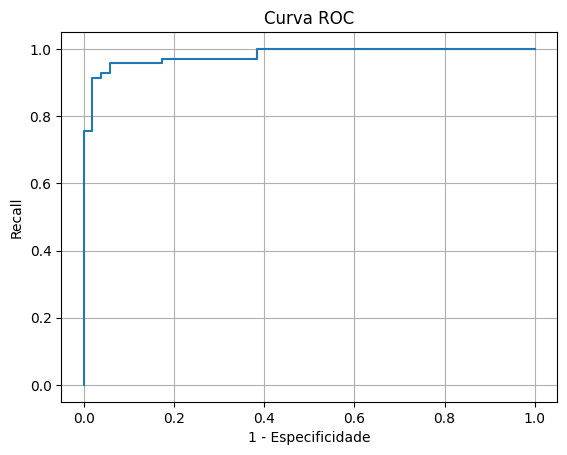

In [23]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.plot(roc[0], roc[1])
plt.grid()
plt.title('Curva ROC')
plt.xlabel('1 - Especificidade')
plt.ylabel('Recall')

plt.show()

In [ ]:
roc

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01923077, 0.01923077, 0.01923077,
        0.01923077, 0.03846154, 0.03846154, 0.05769231, 0.05769231,
        0.09615385, 0.11538462, 0.11538462, 0.17307692, 0.21153846,
        0.23076923, 0.34615385, 0.38461538, 0.40384615, 0.44230769,
        0.48076923, 0.48076923, 0.53846154, 0.55769231, 0.59615385,
        0.61538462, 0.65384615, 0.71153846, 0.94230769, 1.        ]),
 array([0.        , 0.32857143, 0.4       , 0.41428571, 0.47142857,
        0.5       , 0.54285714, 0.6       , 0.61428571, 0.65714286,
        0.74285714, 0.75714286, 0.77142857, 0.81428571, 0.84285714,
        0.85714286, 0.85714286, 0.88571429, 0.88571429, 0.91428571,
        0.94285714, 0.94285714, 0.95714286, 0.95714286, 0.95714286,
        0.98571429, 0.98571429, 0.98571429, 0.98571429, 0.98571429,
        0.98571429, 1.        , 1.        , 1.